In [10]:
import os
import sys
module_path = os.path.abspath('..')
if module_path not in sys.path:
    sys.path.insert(0, module_path)
    
%load_ext autoreload
%autoreload 2
    
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

from optim.lr_scheduler import WarmUpLR, CosineAnnealingLR, NoamLR
from torch.optim import SGD
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
max_epoch = 100
warmup_steps = 10

In [3]:
parameters = [torch.zeros(5)]
optimizer = SGD(parameters, lr=1)


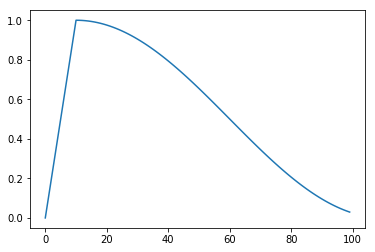

In [5]:
scheduler = WarmUpLR(CosineAnnealingLR(optimizer, T_max=max_epoch), warmup_steps=warmup_steps)
lr = []
for i in range(max_epoch):
    scheduler.step()
    lr += scheduler.get_lr()
plt.plot(lr)

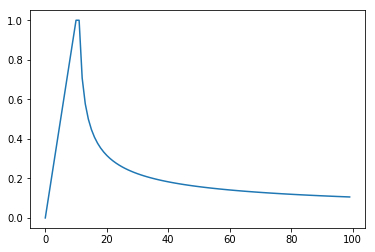

In [15]:
scheduler = WarmUpLR(NoamLR(optimizer, warmup_steps=1), warmup_steps=warmup_steps)
lr = []
for i in range(max_epoch):
    scheduler.step()
    lr += scheduler.get_lr()
plt.plot(lr)